## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

In [1]:
import pandas as pd
import os
import numpy as np

# Import the data using the file path
data_path = ['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')
data['Alley'].shape[0]

1379

## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [2]:
d=data.select_dtypes(include=[object])
l=d[d.columns].apply(lambda x:x.nunique())
l=l.loc[l>1] # values which contains more than 1 value
l-=1

# relative total features
l.sum()


215

 # Just for understanding clearly

In [3]:
p=pd.get_dummies(d)
p=pd.DataFrame(p)
count=0
for i in p.nunique():
    if i>1:
        count+=1
count-d.shape[1]

215

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [4]:
new_dataframe=data.copy()


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
lenc = preprocessing.LabelEncoder()
onehc=OneHotEncoder()
l=onehc.fit_transform([[4],[1],[0]])
dataf=data.drop(columns=d.columns)
for i in d.columns:
    temp_series=lenc.fit_transform(new_dataframe[i])
    col_names=[i+'_'+str(j) for j in list(set(temp_series))]
    onecode=onehc.fit_transform(temp_series.reshape(-1,1))
    new_Data=pd.DataFrame(onecode.toarray(),columns=col_names)
    
    dataf = pd.concat([dataf,new_Data], axis=1)
f=l.toarray()
dataf

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
data=data.drop(columns=d.columns)

## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

**This is train and test splits of non encoded data i.e dataf**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# non encoded

X1=[i for i in data.columns if i!='SalePrice']
X_data1=data[X1]
Y_data1=data['SalePrice']
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_data1,Y_data1, test_size=0.3,random_state=42)



# one hot encoded
X2=[i for i in dataf.columns if i!='SalePrice']
X_data2=dataf[X2]
Y_data2=dataf['SalePrice']
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_data2,Y_data2, test_size=0.3,random_state=42)


In [8]:

LR= LinearRegression()
LR= LR.fit(X_train1, Y_train1)
Y_predict= LR.predict(X_test1)
Y_predictwithtrain=LR.predict(X_train1)

Y_testmeanerror=mean_squared_error(Y_test1,Y_predict)
Y_trainmeanerror=mean_squared_error(Y_train1,Y_predictwithtrain)
min(Y_testmeanerror,Y_trainmeanerror)
Y_testmeanerror,Y_trainmeanerror


(1372182358.9347906, 1131506565.4773366)

**This is train and test splits for onehotencoded data i.e data**

In [9]:

LR=LR.fit(X_train2,Y_train2)
Y_predict2=LR.predict(X_test2)
Y_predict1=LR.predict(X_train2)
Y_predict2,Y_test2

(array([ 3.35758551e+05,  1.30736714e+05,  7.73023343e+04,  2.13609613e+05,
         1.87047686e+05,  6.94689387e+04,  2.17695790e+05,  2.01985690e+05,
         7.22783776e+09,  2.12325443e+05,  1.00944320e+05,  3.10957866e+05,
         1.05450788e+05,  3.47064129e+05,  1.58032835e+05,  1.43650488e+05,
         2.30878605e+05,  1.44315527e+05,  2.23630720e+05,  2.81746744e+05,
         1.21992763e+05,  1.49071213e+05,  1.46632044e+05,  2.48572537e+05,
         4.31426508e+05, -1.10464990e+10,  1.40564576e+05,  1.12331199e+05,
         3.25500444e+05,  1.47257833e+05,  2.54761790e+05,  1.69905348e+05,
         1.94242470e+05,  1.20640384e+05,  2.17118395e+05,  4.36901973e+05,
         9.29419691e+04,  1.10301303e+05,  2.26933255e+05,  1.83385978e+05,
         1.56874382e+05,  1.30049312e+05,  1.75766300e+05,  4.25341555e+05,
         1.57067354e+05,  2.71939610e+05,  9.12936197e+04,  2.65215389e+05,
         1.08971069e+05,  3.37976911e+05,  1.52268764e+05,  3.10577139e+04,
         1.2

In [10]:
Y_testmeanerror2=mean_squared_error(Y_test2,Y_predict2)
Y_trainmeanerror1=mean_squared_error(Y_train2,Y_predict1)
Y_testmeanerror2

1.5667210893373309e+19

# Output
* mean squared error for one hot encoding data is smaller than mean squared error for non encoded data

## Answer 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

**For non encoded data**

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

sd=StandardScaler()
minmax=MinMaxScaler()
maxabs=MaxAbsScaler()
def scale(xtrain,xtest,ytrain,ytest,scaler):

    
    x1=scaler.fit_transform(xtrain)
    LR = LinearRegression()
    LR=LR.fit(x1,ytrain)
    Y_predict2=LR.predict(xtest)
    ytestmeanerror=mean_squared_error(ytest,Y_predict2)
    return ytestmeanerror
# X=data.select_dtypes(include=[float])
# p=[i for i in X.columns if i!='SalePrice']
# #non encoded
# Xdata=X[p]
# Ydata=X['SalePrice']
# X_train1,X_test1,Y_train1,Y_test1 = train_test_split(Xdata,Ydata, test_size=0.3,random_state=42)


print(scale(X_train1,X_test1,Y_train1,Y_test1,sd))
print(scale(X_train1,X_test1,Y_train1,Y_test1,minmax))
print(scale(X_train1,X_test1,Y_train1,Y_test1,maxabs))
print(scale(X_train2,X_test2,Y_train2,Y_test2,sd))
print(scale(X_train2,X_test2,Y_train2,Y_test2,minmax))
print(scale(X_train2,X_test2,Y_train2,Y_test2,maxabs))

1.535573621477147e+16
2.7194722370262615e+18
1.614616285556998e+19
2.678908979794741e+37
8.921975428651329e+18
8.533841762171166e+18


# Answer 6
* Plot predictions vs actual for one of the models.

# plot for one hot encoded data

599     274000.0
881     117500.0
634      87000.0
425     204000.0
906     185000.0
          ...   
942      91000.0
59      101000.0
405     175000.0
458     156000.0
1300    117000.0
Name: SalePrice, Length: 414, dtype: float64

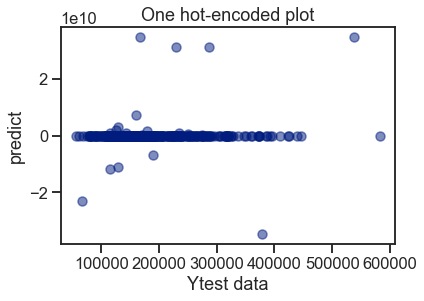

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
a=plt.axes()
a.scatter(Y_test2,Y_predict2,alpha=.5)
a.set(xlabel='Ytest data',ylabel='predict',title='One hot-encoded plot')
Y_test2

# plot for non encoded data

In [ ]:

p=plt.axes()
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
p.scatter(Y_test1,Y_predict,alpha=.5)
p.set(xlabel='Ytest data',ylabel='predict',title='Non-encoded plot')